**Import packages**

In [1]:
!pip install pytictoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Create helper functions**

In [4]:
def plot_sample_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    classes = ["0","1","2","3","4","5","6","7","8","9"]
    plt.xlabel('Image Label: {}'.format(classes[y[index]]))

def classification_results(X_test,y_test,y_pred_classes):
  from sklearn.metrics import confusion_matrix , classification_report
  import seaborn as sn

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(y_test, y_pred_classes))

def plot_fitting_history(history,filename,dpi):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.plot(epoch_data,history.history['val_loss'],'o--')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  plt.xticks(np.arange(0, epochs + 1, step=1))
  plt.legend(['Training','Validation'])
  plt.savefig(filename, dpi=dpi)
  plt.show()

**Plot sample image**

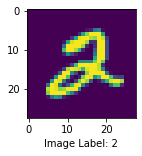

In [5]:
plot_sample_image(X_train, y_train, np.random.randint(100))

**Normalize the input data**

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# MLP (multi-layer perceptron) classifier 

**Fit the model**

In [7]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

C_MLP = models.Sequential([
        layers.Flatten(input_shape=X_train.shape[1:]),
        layers.Dense(2**6, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

C_MLP.summary()

learning_rate =  0.001
C_MLP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

t_MLP = TicToc()
t_MLP.tic()
early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_C_MLP = C_MLP.fit(X_train, y_train, epochs=10, batch_size=32,
            validation_split = 0.2, callbacks = early_callbacks, verbose=1)
t_MLP.toc()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 25s 15ms/step - loss: 0.3368 - accuracy: 0.9057 - val_loss: 0.1859 - val_accuracy: 0.9476
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1633 - accuracy: 0.9527 - val_loss: 0.1452 - val_accuracy: 0.9588
Epoch 3/10
1500/1500 [===

**Check testing accuracy**

In [8]:
C_MLP.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9733


[0.08907735347747803, 0.9732999801635742]

**Plot training and validation loss**

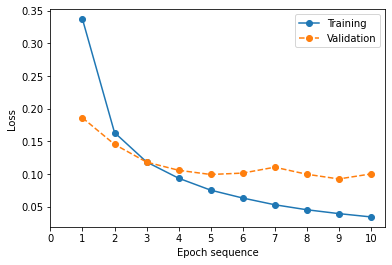

In [9]:
filename = 'Training history MNIST [MLP]'+'.png'
plot_fitting_history(history_C_MLP, filename, dpi = 100)

**Report classification performance & plot confusion matrix**

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.94      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



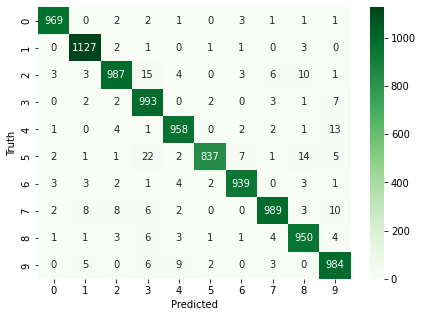

In [10]:
y_pred = C_MLP.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)

In [11]:
C_MLP.save('MLP_MNIST.h5')
from keras.models import load_model
MLP_MNIST = load_model('MLP_MNIST.h5')
MLP_MNIST.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9733


[0.08907735347747803, 0.9732999801635742]